Bias: <br>
Quadratische Abweichung der durchschnittlichen Hypothese h˜ von
der Targetfunktion t ↔ Underfitting


Varianz: <br>
Durchschnittliche quadratische Abweichung der gelernten
Hypothesen {h
D} von der durchschnittlichen Hypothese h˜ ↔
Overfitting


e_out: <br>
Der out-of-sample error ist der durchschnittliche Loss, der sich auf
“typischen” weiteren Daten  ergeben würde, die
nicht zum Training verwendet worden sind: bzw in unserem Fall (es gibt mehrere Varianten E_out zu berechnen)
Eout(h) = Erwartungswert([loss(h(x), y)])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy.polynomial.polynomial as poly

In [2]:
# expect something like this (e.g.): plot_dataframe_with_args([source_data_x,source_data_y,color],[result_data_x, result_data_y, color]) 
def plot_dataframe_with_args(*args):#(x_source, y_source, color_source, x_results, y_results, color_results, add_offset = False):
#     for i in args:
#         if i != args[0]:
    #plt.figure(figsize=(60, 25))
    plt.title('Uebung 3')
    plt.xlabel('Uebung3 - x')
    plt.ylabel('Uebung3 - y')
    plt.grid(linestyle='-')
    for i in args:
        plt.plot(i[0],i[1],marker='o', color='b') 
    plt.show()

In [3]:
def generate_lin_equation(x_1,y_1,x_2,y_2,x_ges,polynomengrad):

    x_new = np.linspace(x_ges[0], x_ges[-1], num=len(x_ges))

    coefs = poly.polyfit([x_1,x_2], [y_1,y_2], polynomengrad) # sind coefficienten für polynom, nicht aber funktionswerte im Format: theto0 + theta_1(* x_1) + theta_n(*x_n)  d.h. der erste Wert ist theta_0
    funktionswerte_durch_gegebene_coefficienten = poly.polyval(x_new, coefs) # sind Funktionswerte auf Basis gegebener x-Grundlagenwerte
    if(coefs.shape[0] == 1):
        coefs = np.append(coefs,0)
    return x_new,funktionswerte_durch_gegebene_coefficienten,coefs[0],coefs[1]

In [4]:
def create_function_with_given_theta(average_theta_0,average_theta_1,x_ges):
    theta_vector = [average_theta_0,average_theta_1]
    x_new = np.linspace(x_ges[0], x_ges[-1], num=len(x_ges))
    funktionswerte_durch_gegebene_coefficienten = poly.polyval(x_new, theta_vector)
    return x_new, funktionswerte_durch_gegebene_coefficienten

In [5]:
def hypothesis(theta):
    def tmp(x):
        return np.array(x.dot(theta))
    return tmp

In [6]:
def mse_loss(hypothesis, x, y): 
    return lambda theta : np.square(y - ((hypothesis(theta))(x)))

#Berechnung der Kosten über die beiden Punkte d.h.
# X = Vector aus 2 x-Werten
# y = Vector aus 2 y-Werten
# h = welche Hypothese nehme ich
# loss = welchen loss nehme ich
def cost_function(X,y,h,loss):
    return lambda theta : (np.mean(loss(h,X,y)(theta))) #1/(2*len(y))* 
    #
    #np.sum(


In [7]:
def calculate_e_out(x_GERADE_para,theta_0_para,theta_1_para,y_target_para,hypothesis_para,loss_para):
    x_GERADE_0 = [1 for i in range(len(x_GERADE_para))] #np ones
    x_GERADE_ges = np.array([[x_GERADE_0[i],x_GERADE_para[i]] for i in range(len(x_GERADE_para))])
    theta_vector = np.asarray([theta_0_para,theta_1_para])
    #theta_vector_test = np.asarray([0.75,-0.15])
    e_out_mse = cost_function(x_GERADE_ges,y_target_para,hypothesis_para,loss_para)(theta_vector)
    return e_out_mse

In [8]:
# e out bedeuted hier glaube immer einfach kosten
def calculate_variance(all_theta_0,all_theta_1,average_theta_0,average_theta_1,x_ges):
    x_new_average_hyp, y_new_average_hyp = create_function_with_given_theta(average_theta_0,average_theta_1,x_ges)
    e_out_list = np.array([])
    i = 0
    while(i < all_theta_0.shape[0]):
        x_new_learnd_hypo, y_new_learnd_hypo = create_function_with_given_theta(all_theta_0[i],all_theta_1[i],x_ges)
        e_out = calculate_e_out(x_new_learnd_hypo,all_theta_0[i],all_theta_1[i],y_new_average_hyp,hypothesis,mse_loss)
        e_out_list = np.append(e_out_list,e_out)
        i+=1
    variance = np.divide(np.sum(e_out_list),e_out_list.shape[0]) # shape[0] = length
    return variance

In [9]:
def display_variance(all_theta_0,all_theta_1,average_theta_0,average_theta_1,x_ges,y_target):
    x_new_average_hyp, y_new_average_hyp = create_function_with_given_theta(average_theta_0,average_theta_1,x_ges)
    plt.grid(linestyle='-')
    plt.plot(x_ges, y_target,marker='o', color='b')
    i = 0
    while(i < all_theta_0.shape[0]):
        x_new_learnd_hypo, y_new_learnd_hypo = create_function_with_given_theta(all_theta_0[i],all_theta_1[i],x_ges)
        plt.plot(x_new_learnd_hypo, y_new_learnd_hypo)
        i+=1
    plt.show()
    #return variance

In [10]:
#############
interval_min = 0
interval_max = 2*np.pi
number_of_feature_values = 100 #aka how many training-examples do i have?
number_of_data_points = 10000
number_of_GERADEN_points = 10
#############

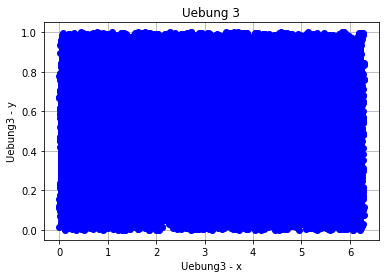

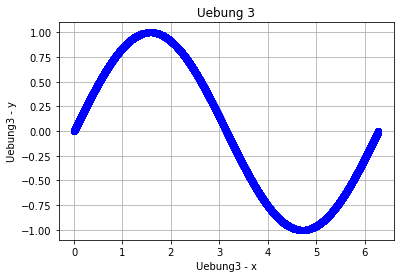

In [11]:
#############
x = np.linspace(interval_min, interval_max, number_of_data_points)
y = [np.random.uniform() for _ in x]#############
y_target = np.sin(x)
plot_dataframe_with_args([x, y]) # show uniform_distribution
plot_dataframe_with_args([x, y_target]) # show sin_function
#############

In [12]:
#############
#SETTING UP 1 EXAMPLE
concat_x_y = list(zip(x,y_target))
data_set_with_x_example_each = np.asarray(random.sample(concat_x_y, len(concat_x_y)))
first = data_set_with_x_example_each[0]
second = data_set_with_x_example_each[1]
#############



EXAMPLE GERADEN FUNCTION




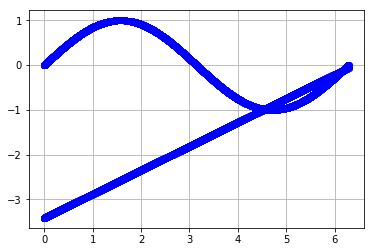

In [13]:
#############
#PLOTTET 1 POSSIBLE LEARND STRAIGHT LINE
x_GERADE,y_GERADE, theta_0, theta_1 = generate_lin_equation(first[0],first[1],second[0],second[1],x,1)
print("\n\nEXAMPLE GERADEN FUNCTION\n\n")
plt.grid(linestyle='-')
plt.plot(x_GERADE, y_GERADE,marker='o', color='b')
plt.plot(x, y_target,marker='o', color='b')
plt.show()
#############

In [14]:
#############
e_out_mse = calculate_e_out(x_GERADE,theta_0,theta_1,y_target,hypothesis,mse_loss)
#############

In [15]:
i = 0
e_out_list = np.array([])
theta_0_list = np.array([])
theta_1_list = np.array([])
while(i < (data_set_with_x_example_each.shape[0] -1)):
    first = data_set_with_x_example_each[i]
    second = data_set_with_x_example_each[i+1]
    
    x_GERADE,y_GERADE, theta_0, theta_1 = generate_lin_equation(first[0],first[1],second[0],second[1],x,1) # 1 da wir theta0 + theta1*x haben
    e_out_mse = calculate_e_out(x_GERADE,theta_0,theta_1,y_target,hypothesis,mse_loss)
    
    e_out_list = np.append(e_out_list,e_out_mse)
    theta_0_list = np.append(theta_0_list,theta_0)
    theta_1_list = np.append(theta_1_list,theta_1)
    i+=2

In [16]:
# For only theta0
i = 0
e_out_list_theta0_only = np.array([])
theta_0_list_theta0_only = np.array([])
theta_1_list_theta0_only = np.array([])
while(i < (data_set_with_x_example_each.shape[0] -1)):
    first = data_set_with_x_example_each[i]
    second = data_set_with_x_example_each[i+1]
    
    x_GERADE_theta0_only,y_GERADE_theta0_only, theta_0_theta0_only, theta_1_theta0_only = generate_lin_equation(first[0],first[1],second[0],second[1],x,0)
    e_out_mse_theta0_only = calculate_e_out(x_GERADE_theta0_only,theta_0_theta0_only,theta_1_theta0_only,y_target,hypothesis,mse_loss)
    
    e_out_list_theta0_only = np.append(e_out_list_theta0_only,e_out_mse_theta0_only)
    theta_0_list_theta0_only = np.append(theta_0_list_theta0_only,theta_0_theta0_only)
    theta_1_list_theta0_only = np.append(theta_1_list_theta0_only,theta_1_theta0_only)
    i+=2

In [17]:
average_theta_0 = np.divide(np.sum(theta_0_list),theta_0_list.shape[0])
average_theta_1 = np.divide(np.sum(theta_1_list),theta_1_list.shape[0])
# siehe Folie 31
average_e_out = np.divide(np.sum(e_out_list),e_out_list.shape[0]) # shape[0] = length
print("H1: Average theta_0: ", average_theta_0)
print("H1: Average theta_1: ", average_theta_1)
print("H1: Average e_out: ", average_e_out)

H1: Average theta_0:  0.751004694069793
H1: Average theta_1:  -0.2428749425350432
H1: Average e_out:  1.9050916355318055


In [18]:
# theta0_only
average_theta_0_theta0_only = np.divide(np.sum(theta_0_list_theta0_only),theta_0_list_theta0_only.shape[0])
average_theta_1_theta0_only = np.divide(np.sum(theta_1_list_theta0_only),theta_1_list_theta0_only.shape[0])
# siehe Folie 31
average_e_out_theta0_only = np.divide(np.sum(e_out_list_theta0_only),e_out_list_theta0_only.shape[0]) # shape[0] = length
print("H0: Average _theta0_only: ", average_theta_0_theta0_only)
print("H0: Average _theta0_only: ", average_theta_1_theta0_only)
print("H0: Average e_out_theta0_only: ", average_e_out_theta0_only)

H0: Average _theta0_only:  0.0
H0: Average _theta0_only:  0.0
H0: Average e_out_theta0_only:  0.7509082666641516




 AVERAGE HYPOTHESIS 




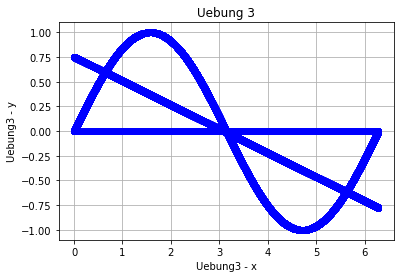

In [19]:
x_new, y_new = create_function_with_given_theta(average_theta_0,average_theta_1,x)
x_new_theta0_only, y_new_theta0_only = create_function_with_given_theta(average_theta_0_theta0_only,average_theta_1_theta0_only,x)
print("\n\n AVERAGE HYPOTHESIS \n\n")
plot_dataframe_with_args([x_new,y_new],[x, y_target],[x_new_theta0_only, y_new_theta0_only])

In [20]:
print(average_theta_0, "  ", average_theta_1)

0.751004694069793    -0.2428749425350432


In [21]:
print(average_theta_0_theta0_only, "  ", average_theta_1_theta0_only)

0.0    0.0


#### Quadratische Abweichung der durchschnittlichen Hypothese h˜ von
#### der Targetfunktion t ↔ Underfitting

In [22]:
e_out_mse = calculate_e_out(x_new,average_theta_0,average_theta_1,y_target,hypothesis,mse_loss)
e_out_mse_theta0_only = calculate_e_out(x_new_theta0_only,average_theta_0_theta0_only,average_theta_1_theta0_only,y_target,hypothesis,mse_loss)

print("Bias H1: ", e_out_mse)
print("Bias H0: ", e_out_mse_theta0_only)

Bias H1:  0.20849527267303752
Bias H0:  0.49995


In [23]:
variance = calculate_variance(theta_0_list,theta_1_list,average_theta_0,average_theta_1,x)
print("Varianz H1: ", variance)

Varianz H1:  1.6965963628587681


In [24]:
variance_theta0_only = calculate_variance(theta_0_list_theta0_only,theta_1_list_theta0_only,average_theta_0_theta0_only,average_theta_1_theta0_only,x)
print("Varianz H0", variance_theta0_only)

Varianz H0 0.2509582666641516


In [25]:
# E_out = var + bias
print("Expected e_out of model H_0:", e_out_mse_theta0_only + variance_theta0_only)
print("Expected e_out of model H_1:", e_out_mse + variance)
print("\n\n")
print("Intendet e_out of model H_0: 0.75 ")
print("Intendet e_out of model H_1: 1.9")

Expected e_out of model H_0: 0.7509082666641516
Expected e_out of model H_1: 1.9050916355318057



Intendet e_out of model H_0: 0.75 
Intendet e_out of model H_1: 1.9


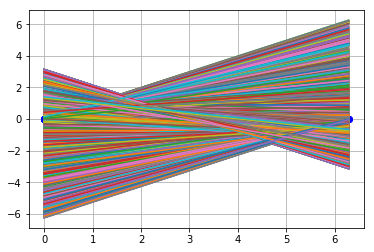

In [26]:
display_variance(theta_0_list,theta_1_list,average_theta_0_theta0_only,average_theta_1_theta0_only,x,y_target)

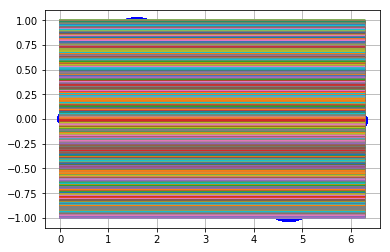

In [27]:
display_variance(theta_0_list_theta0_only,theta_1_list_theta0_only,average_theta_0_theta0_only,average_theta_1_theta0_only,x,y_target)